# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [140]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Зафиксировал random_state=42 для воспроизводимости результатов.

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [142]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [143]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [144]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

from catboost import CatBoostClassifier, Pool

sns.set(style='darkgrid')
%matplotlib inline

In [146]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)

Добавил функцию для игнорирования предупреждений в свяи с недостаточным для сходимости количеством итераций оптимизационной функции логиcтиеской регресии.

In [147]:
### YOUR CODE HERE

standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_train_scaled_pd = pd.DataFrame(X_train_scaled)

X_test_scaled = standard_scaler.transform(X_test)

In [148]:
X_train_scaled_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.637047,0.183598,-0.597777,0.012476,0.054395,0.472284,0.137689,-0.687497,0.608297,-0.581728,-0.166848,-0.780506,-0.686078,-1.062937,-1.113250,-0.506961,-0.526512,1.589445,1.497509
1,0.249008,1.300787,2.004242,1.332049,1.629299,1.457618,0.898673,1.652617,-1.450771,1.795707,2.022237,1.192623,1.672040,1.392667,-0.021624,0.899719,-0.073270,-0.476457,-0.114779
2,-1.006837,-0.312931,-0.435151,-0.992913,0.024108,0.613046,-0.369634,-0.687497,0.350914,-0.581728,-0.508893,-0.583193,-0.621872,-0.464777,-0.703890,-0.506961,-1.432996,1.907276,1.497509
3,-0.209541,1.921448,1.191111,0.829354,0.629840,-0.513051,-1.130619,1.837362,-1.579463,1.795707,0.722468,2.475157,2.010581,1.361185,1.342909,-1.310778,0.719903,-0.317542,-1.323994
4,0.422513,0.183598,0.377980,-0.553056,0.811560,1.176094,-0.369634,-0.010095,-0.421237,-0.185489,0.312014,-0.089911,-0.008995,0.353758,-0.430984,0.497810,0.719903,1.748361,1.363151
5,-0.837463,-1.554252,-0.109899,-0.615892,-0.884491,-0.231527,-0.623296,-0.441169,0.350914,-0.581728,-0.098439,-0.221453,-0.493459,0.133383,1.206456,-1.109824,0.266661,-1.112119,-1.323994
6,1.711407,-0.064666,-1.736160,-0.992913,-0.854204,-0.794575,-0.369634,-1.149361,1.251756,-0.977968,-1.877071,-1.175132,-1.053804,-1.881471,-1.386157,-0.306007,1.853008,1.907276,1.497509
7,0.691032,-0.561195,-0.272525,-0.301708,-0.642198,-1.076099,-0.115973,-0.718288,0.608297,-0.581728,-0.098439,-0.780506,-0.721099,0.007455,-1.113250,1.301627,-0.866443,0.794867,0.691365
8,-0.329342,2.914505,1.191111,1.771907,1.811018,0.472284,0.898673,1.375498,-1.322080,1.399468,1.064513,1.357051,1.380194,1.455632,-0.840344,2.909261,1.399766,0.794867,1.228794
9,-0.283900,1.921448,0.703232,1.709070,0.750987,-0.372289,0.391350,1.221543,-1.193388,1.399468,0.585650,1.258394,1.187575,1.235257,-0.294530,1.301627,2.079629,0.318121,0.825722


In [149]:
X_train_scaled_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-4.853434e-17,-4.109241e-16,-2.103155e-16,4.271022e-16,-4.109241e-16,-2.992951e-17,1.682524e-16,3.429760e-16,-3.203266e-16,-5.824121e-16,5.338777e-16,3.882747e-17,-1.536921e-16,-1.617811e-16,-2.944417e-16,-5.176996e-17,-7.765494e-17,-1.947845e-15,1.779592e-16
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.758692e+00,-2.174913e+00,-1.898786e+00,-2.500997e+00,-1.944522e+00,-2.061434e+00,-1.637942e+00,-1.642016e+00,-1.965539e+00,-1.374207e+00,-2.013889e+00,-1.832842e+00,-1.404020e+00,-1.944436e+00,-1.795517e+00,-1.310778e+00,-1.432996e+00,-2.065613e+00,-1.995781e+00
25%,-8.622499e-01,-8.094592e-01,-7.604032e-01,-7.415660e-01,-8.542040e-01,-6.538129e-01,-3.696342e-01,-6.567056e-01,-9.360042e-01,-5.817283e-01,-7.825282e-01,-6.489643e-01,-6.685671e-01,-8.110799e-01,-7.038902e-01,-9.088694e-01,-7.531330e-01,-7.942883e-01,-6.522080e-01
50%,1.766804e-02,-6.466630e-02,-1.098986e-01,-1.760347e-01,-9.703854e-02,-9.076461e-02,-1.159727e-01,-3.180050e-01,2.222219e-01,-1.854890e-01,-1.668480e-01,-3.201094e-01,-4.000686e-01,-2.402732e-02,-1.580770e-01,-1.050526e-01,-1.865805e-01,2.894637e-04,1.539358e-01
75%,8.686685e-01,6.801266e-01,7.032322e-01,1.017865e+00,8.115600e-01,6.130457e-01,3.913502e-01,8.828425e-01,6.082973e-01,1.003229e+00,7.908769e-01,9.624247e-01,8.431964e-01,7.000611e-01,3.877361e-01,6.987643e-01,7.199035e-01,6.359517e-01,6.913649e-01
max,1.732062e+00,2.914505e+00,2.329494e+00,1.771907e+00,4.173375e+00,9.058770e+00,1.104513e+01,3.007419e+00,2.281291e+00,3.380664e+00,2.637918e+00,3.330180e+00,3.423117e+00,2.966772e+00,7.483308e+00,3.110215e+00,3.099424e+00,2.701854e+00,2.034938e+00


Применили стандартизацию для того, чтобы признаки имели нулевое среднее и одинаковую дисперсию. Это может помочь как раз для работы логистической регрессии, SVM и PCA.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [150]:
### YOUR CODE HERE

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

log_reg_params= {'C': np.logspace(-5, 5, 11), 'penalty': ['l1', 'l2'], 'fit_intercept': [True, False]}

log_reg_clf = GridSearchCV(log_reg, log_reg_params)

In [151]:
log_reg_clf.fit(X_train_scaled, y_train)

y_pred = log_reg_clf.predict(X_test_scaled)
predicted_proba = log_reg_clf.predict_proba(X_test_scaled)

In [152]:
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.7967694967694967
Accuracy: 0.8047138047138047


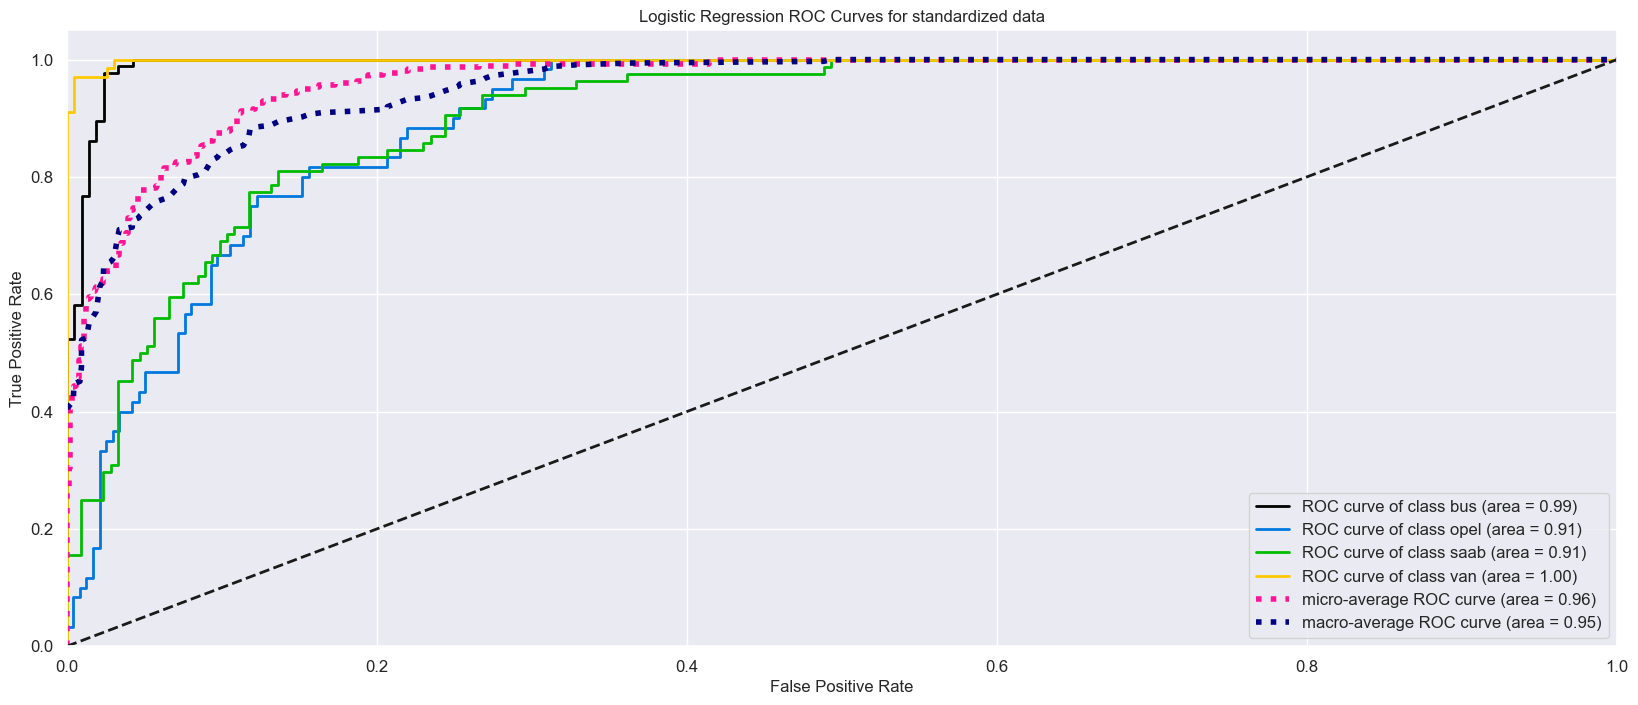

In [153]:
plt.rcParams['figure.figsize'] = (20, 8)

skplt.metrics.plot_roc(y_test, predicted_proba)
plt.title('Logistic Regression ROC Curves for standardized data')

plt.show()

В данной части обучили модель для классификации вида машин. Она проявила относительно высокую точность на тестовой выборке: ~80%. Из графика видно, что у модели довольно высокая доля предсказания истинно положительно результатов относительно ложно положительных (так как все ROC кривые довольно сильно выше диагонали).

In [154]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [155]:
### YOUR CODE HERE

pca = PCA()

X_train_scaled_pca = pca.fit_transform(X_train_scaled)

explained_variance = pca.explained_variance_ratio_

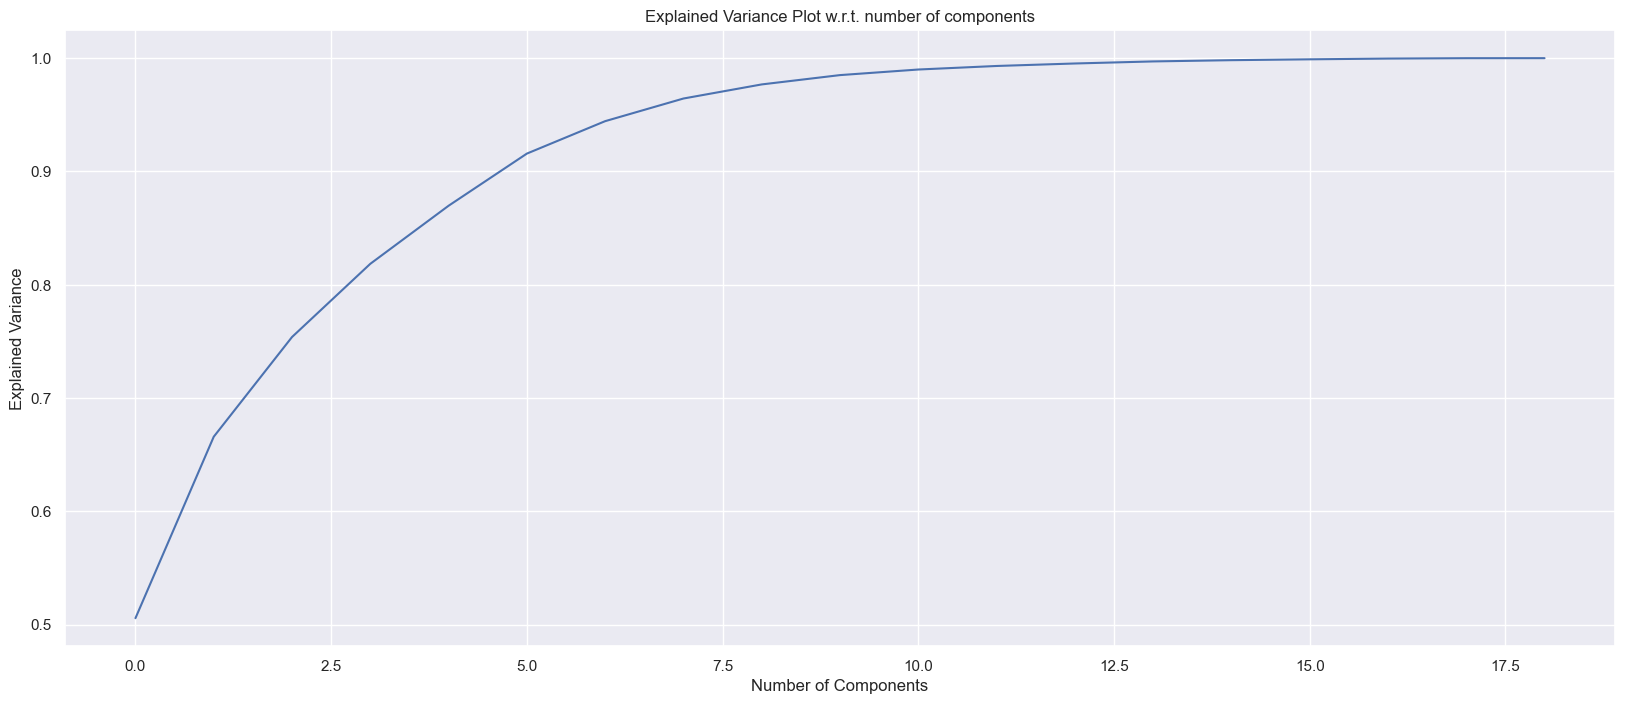

In [156]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Plot w.r.t. number of components')

plt.show()

Из графика видно, что требуется не слишком много компонент для описания большей части дисперсии данных. Вероятно, оптимальным их количеством по соотношению точность-количество будет значение 13, так как именно после взятия 13 компонент далнейшее увеличение объясненной дисперсии становится совсем незначительным.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [157]:
### YOUR CODE HERE

components_amount = 13

pca = PCA(n_components=components_amount)

X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [158]:
### YOUR CODE HERE

log_reg_clf.fit(X_train_scaled_pca, y_train)

y_pred = log_reg_clf.predict(X_test_scaled_pca)
predicted_proba = log_reg_clf.predict_proba(X_test_scaled_pca)

Видно значительное ускорение в работе кода.

In [159]:
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.7460264021817159
Accuracy: 0.7542087542087542


Но при этом имеет место быть заметное ухудщение точности предсказаний, что, в целом, ожидаемо.

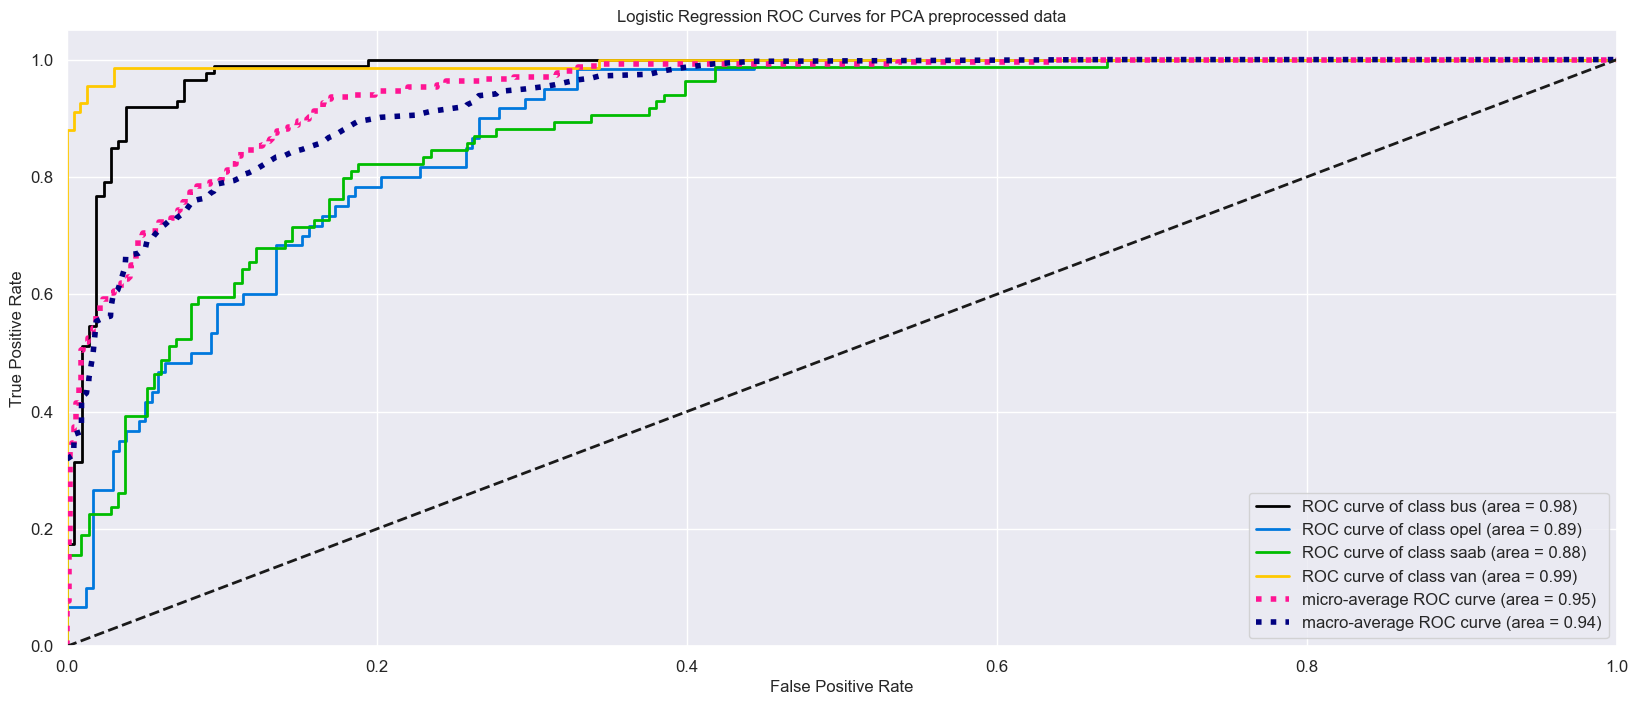

In [160]:
plt.rcParams['figure.figsize'] = (20, 8)

skplt.metrics.plot_roc(y_test, predicted_proba)
plt.title('Logistic Regression ROC Curves for PCA preprocessed data')

plt.show()

У модели все еще довольно высокая доля предсказания истинно положительно результатов относительно ложно положительных, но кривые некоторых классов (saab и opel) довольно заметно опустились (то есть, вероятно, модель стала заметно хуже предсказывать именно их).

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [161]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

tree_params = {'max_depth': range(1, 51)}

tree = DecisionTreeClassifier(random_state=42)

tree_clf = GridSearchCV(tree, tree_params, cv=5)

Зафиксировал random_state=42 для воспроизводимости результата.

In [162]:
tree_clf.fit(X_train_scaled_pca, y_train)

y_pred = tree_clf.predict(X_test_scaled_pca)
predicted_proba = tree_clf.predict_proba(X_test_scaled_pca)

In [163]:
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.5849635400532702
Accuracy: 0.6026936026936027


Наблюдаеются относительно небольшие потери в точности предсказаний, но при этом значительное даже относительно логистической регрессии с PCA предобработанными данными ускорение времени работы.

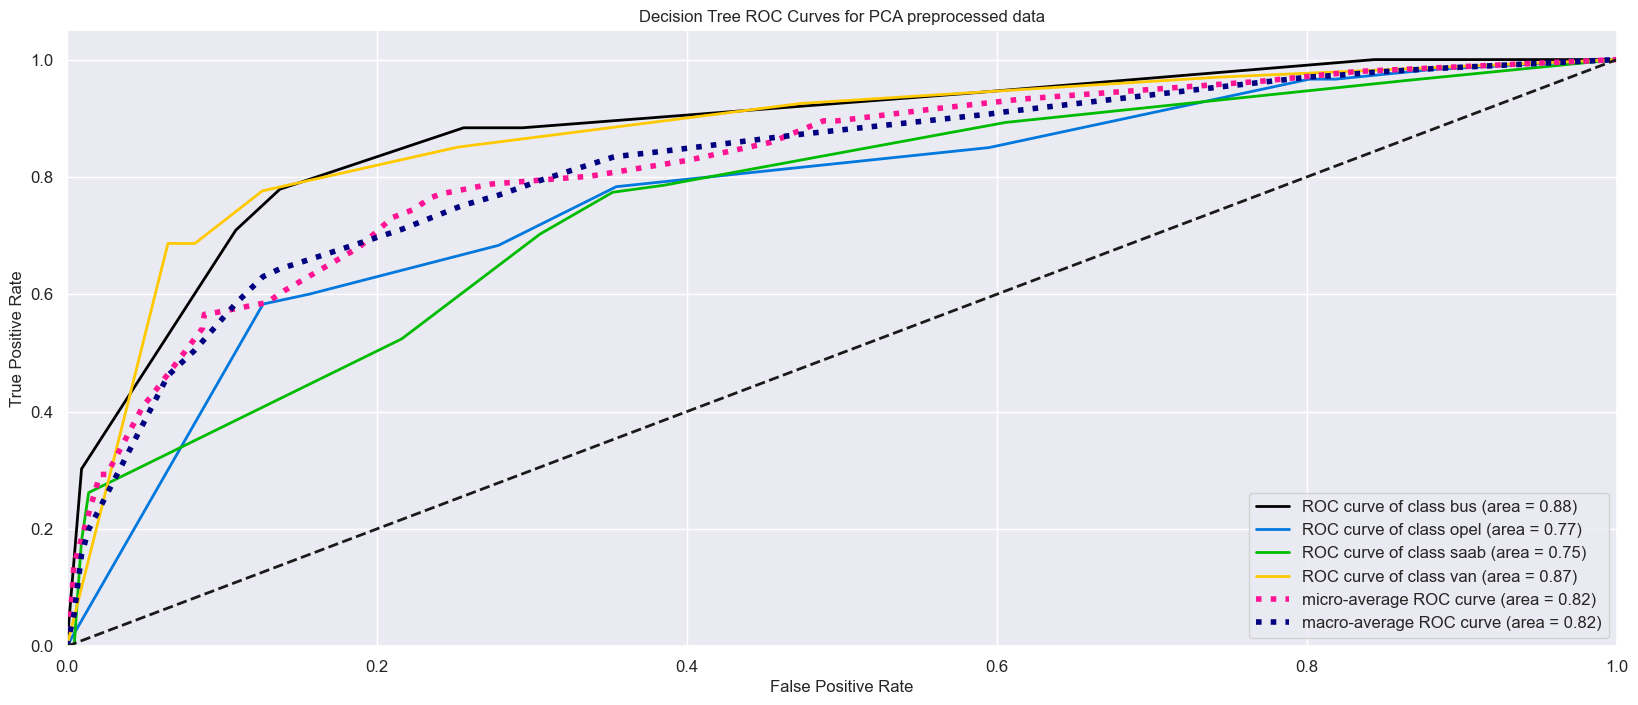

In [164]:
plt.rcParams['figure.figsize'] = (20, 8)

skplt.metrics.plot_roc(y_test, predicted_proba)
plt.title('Decision Tree ROC Curves for PCA preprocessed data')

plt.show()

Понятно, что из-за особенности логики работы дерева принятий решений ROC кривые выглядят менее гладкими с только несколькью уголками (так как есть только несколько "уникальных" точек, в которых TPR и FPR меняются). В целом, их расположение относительно диагонали прмерно такое же, как и в прошлый раз.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [165]:
# YOUR CODE HERE

def evaluate_bagging_ensemble(n, estimator, X_train, y_train, X_test, y_test):
    clf = BaggingClassifier(estimator=estimator, n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred, average='macro'), accuracy_score(y_test, y_pred)

N_min, N_max, step = 2, 100, 5
N_list = np.arange(N_min, N_max, step)


Зафиксировал random_state=42 для воспроизводимости результата.

In [166]:
f1_log_reg_bagging, accuracy_log_reg_bagging = [], []

for n in N_list:
    f1, accuracy = evaluate_bagging_ensemble(n, log_reg_clf.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)
    f1_log_reg_bagging.append(f1)
    accuracy_log_reg_bagging.append(accuracy)

In [167]:
f1_tree_bagging, accuracy_tree_bagging = [], []

for n in N_list:
    f1, accuracy = evaluate_bagging_ensemble(n, tree_clf.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)
    f1_tree_bagging.append(f1)
    accuracy_tree_bagging.append(accuracy)

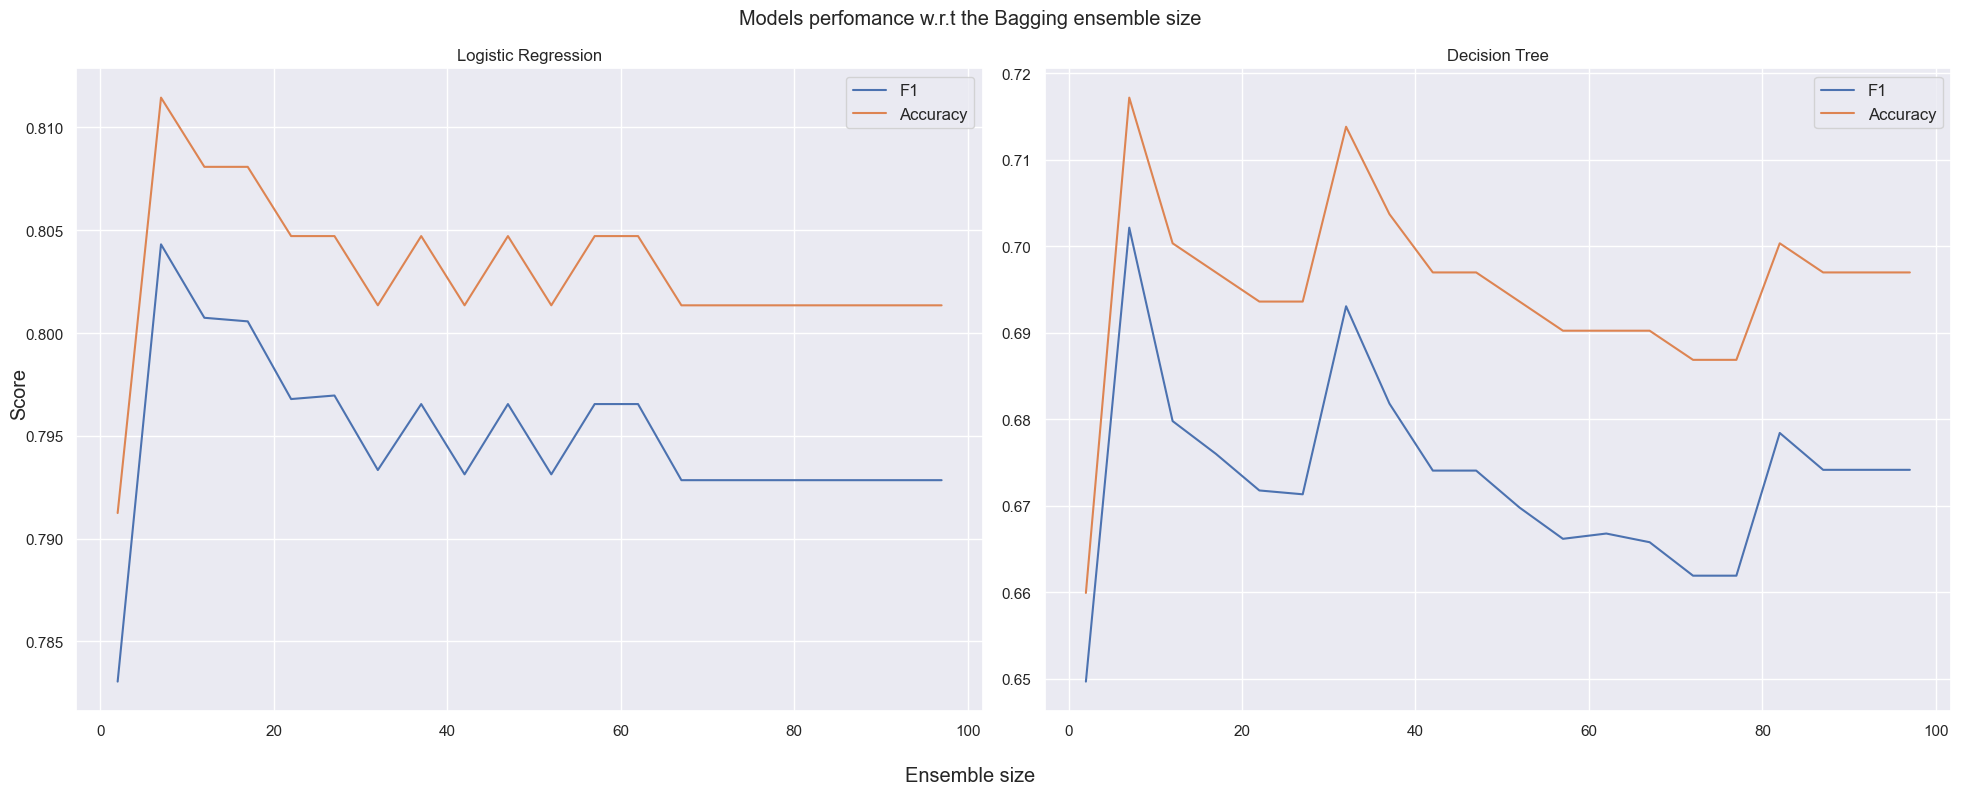

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle('Models perfomance w.r.t the Bagging ensemble size')
fig.supxlabel('Ensemble size')
fig.supylabel('Score')

plt.subplot(1, 2, 1)
plt.plot(N_list, f1_log_reg_bagging, label='F1')
plt.plot(N_list, accuracy_log_reg_bagging, label='Accuracy')
plt.title('Logistic Regression')
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(N_list, f1_tree_bagging, label='F1')
plt.plot(N_list, accuracy_tree_bagging, label='Accuracy')
plt.title('Decision Tree')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [169]:
best_log_reg_bagging_ensembles_amount_index = np.argmax(accuracy_log_reg_bagging)
best_tree_bagging_ensembles_amount_index = np.argmax(accuracy_tree_bagging)

print(f'Наибольшие значения' 
      f'\nF1 Score = {f1_log_reg_bagging[best_log_reg_bagging_ensembles_amount_index]}', 
      f'\nAccuracy Score = {accuracy_log_reg_bagging[best_log_reg_bagging_ensembles_amount_index]}'
      f'\nмодели логистической регресии достигаются при размере ансамбля равном = {N_list[best_log_reg_bagging_ensembles_amount_index]}')
print()
print(f'Наибольшие значения' 
      f'\nF1 Score = {f1_tree_bagging[best_tree_bagging_ensembles_amount_index]}', 
      f'\nAccuracy Score = {accuracy_tree_bagging[best_tree_bagging_ensembles_amount_index]}'
      f'\nмодели дерева принятий решений достигаются при размере ансамбля равном = {N_list[best_tree_bagging_ensembles_amount_index]}')

Наибольшие значения
F1 Score = 0.8043118983259828 
Accuracy Score = 0.8114478114478114
модели логистической регресии достигаются при размере ансамбля равном = 7

Наибольшие значения
F1 Score = 0.7021411442274751 
Accuracy Score = 0.7171717171717171
модели дерева принятий решений достигаются при размере ансамбля равном = 7


Таким образом, из графиков и проведенного вычисления видно, что оптимальным по F1 и Accuracy количеством ансамблей является 7 для логичтической регрессии и 7 (это число менется в зависимоти от запуска) для дерева принятия решений. Причем, как и ожидаемо, результат хоть и несильно, но улучшился по сравнению с предыдущими попытками обучения модели.

Я думаю, что гиперпараметры из пункта 2.5 не будут оптимальными для деревьев в ансамбле. Во-первых, деревья возможно стоит заново обучать для меньшей скореллированности ошибок. Во-вторых, в ансамблях деревья могут строиться глубже, так как переобучение обычно компенсируется усреднением ответов многих деревьев.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [170]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

def evaluate_random_forest_ensemble(n, X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred, average='macro'), accuracy_score(y_test, y_pred)

N_min, N_max, step = 2, 100, 5
N_list = np.arange(N_min, N_max, step)

Зафиксировал random_state=42 для воспроизводимости результата.

In [171]:
f1_tree_random_forest, accuracy_tree_random_forest = [], []

for n in N_list:
    f1, accuracy = evaluate_random_forest_ensemble(n, X_train_scaled, y_train, X_test_scaled, y_test)
    f1_tree_random_forest.append(f1)
    accuracy_tree_random_forest.append(accuracy)

Метод выполняется гораздо быстрее предыдущих.

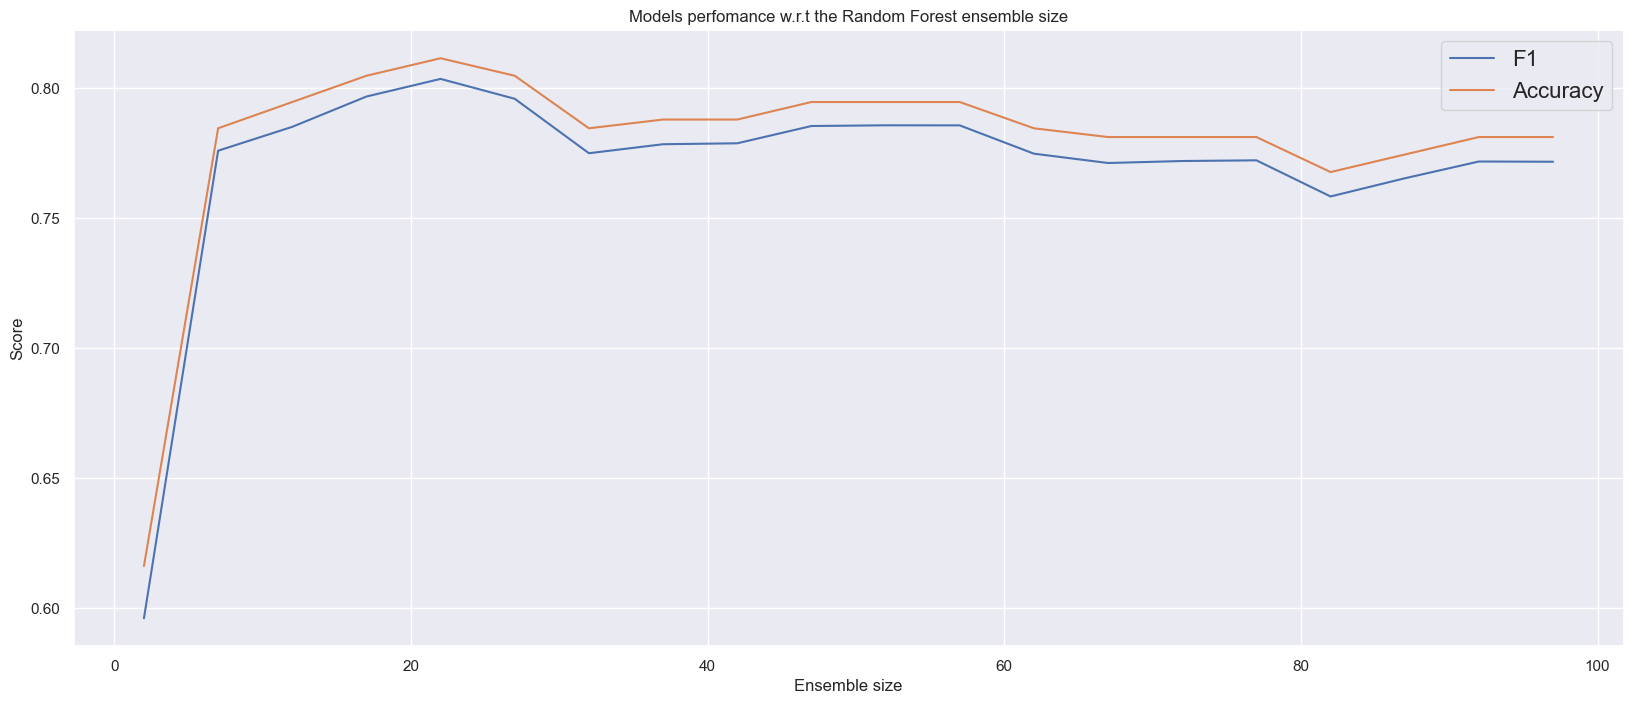

In [172]:
plt.figure(figsize=(20, 8))

plt.plot(N_list, f1_tree_random_forest, label='F1')
plt.plot(N_list, accuracy_tree_random_forest, label='Accuracy')
plt.title('Models perfomance w.r.t the Random Forest ensemble size')
plt.xlabel('Ensemble size')
plt.ylabel('Score')
plt.legend(fontsize=16)

plt.show()

In [173]:
best_tree_ensembles_amount_index = np.argmax(accuracy_tree_random_forest)

print(f'Наибольшие значения' 
      f'\nF1 Score = {f1_tree_random_forest[best_tree_ensembles_amount_index]}', 
      f'\nAccuracy Score = {accuracy_tree_random_forest[best_tree_ensembles_amount_index]}'
      f'\nмодели логистической регресии достигаются при размере ансамбля равном = {N_list[best_tree_ensembles_amount_index]}')

Наибольшие значения
F1 Score = 0.8035034169124191 
Accuracy Score = 0.8114478114478114
модели логистической регресии достигаются при размере ансамбля равном = 22


Таким образом, из графиков и проведенного вычисления видно, что оптимальным по F1 и Accuracy количеством ансамблей является 22. Результат же почти такой же, как в случае бэггинга логистической регресии, но заметно лучше, чем у бэггинга дерева принятий решений.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [174]:
# YOUR CODE HERE

def evaluate_on_parts(clf, train_subsets, label_subsets, X_test, y_test):
    f1_scores = []
    accuracy_scores = []
    for i in range(10):
        X_train_subset = np.vstack(train_subsets[:i+1])
        y_train_subset = np.hstack(label_subsets[:i+1])
        clf.fit(X_train_subset, y_train_subset)
        y_pred = clf.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    return f1_scores, accuracy_scores

train_subsets = np.array_split(X_train_scaled, 10)
label_subsets = np.array_split(y_train, 10)
dataset_sizes_list = np.cumsum([len(subset) for subset in train_subsets])

forest_clf = RandomForestClassifier(n_estimators=N_list[best_tree_ensembles_amount_index], random_state=42)

In [175]:
f1_log_reg, accuracy_log_reg = evaluate_on_parts(log_reg_clf, train_subsets, label_subsets, X_test_scaled, y_test)
f1_tree, accuracy_tree = evaluate_on_parts(tree_clf, train_subsets, label_subsets, X_test_scaled, y_test)
f1_forest, accuracy_forest = evaluate_on_parts(forest_clf, train_subsets, label_subsets, X_test_scaled, y_test)

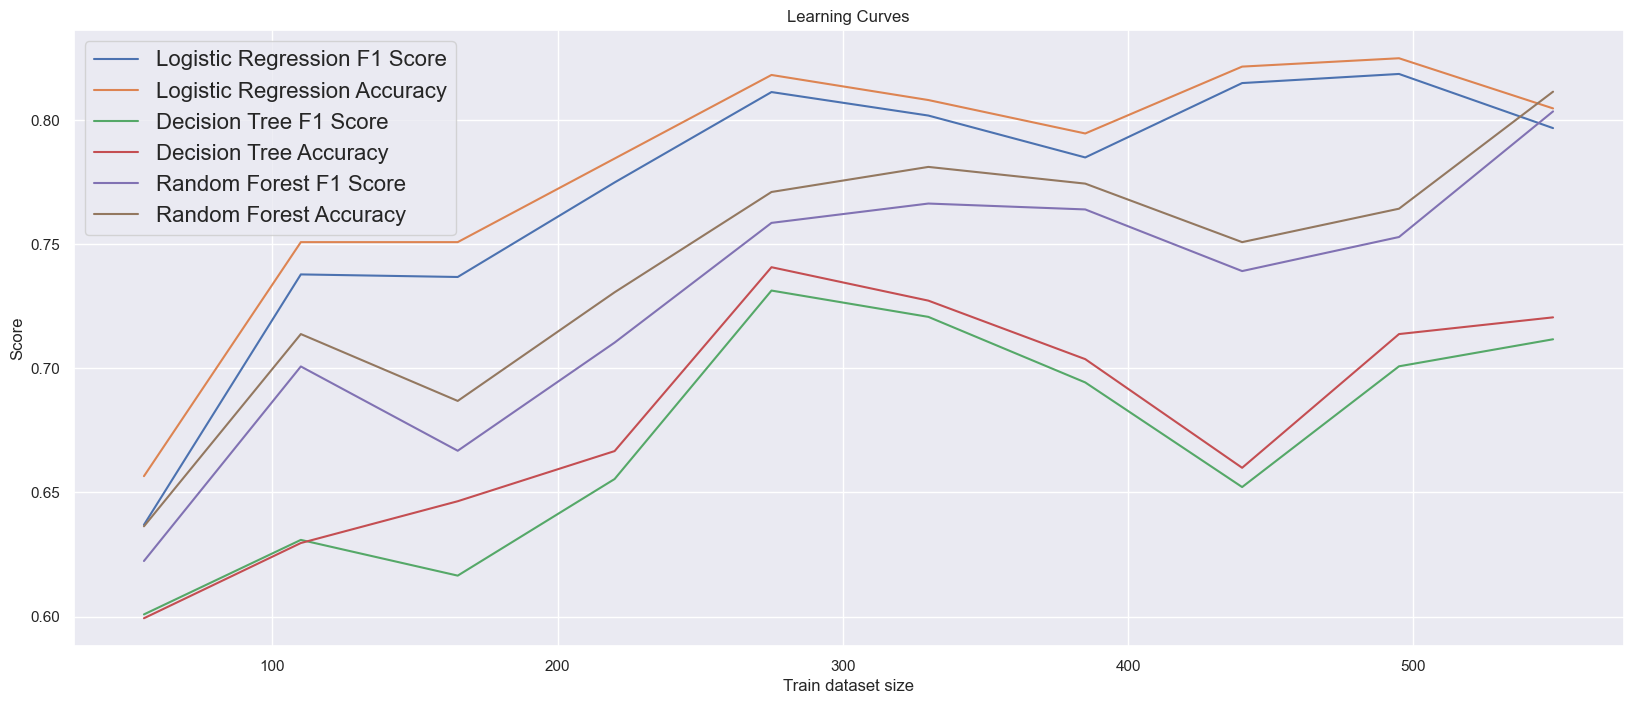

In [176]:
plt.figure(figsize=(20, 8))

plt.plot(dataset_sizes_list, f1_log_reg, label='Logistic Regression F1 Score')
plt.plot(dataset_sizes_list, accuracy_log_reg, label='Logistic Regression Accuracy')
plt.plot(dataset_sizes_list, f1_tree, label='Decision Tree F1 Score')
plt.plot(dataset_sizes_list, accuracy_tree, label='Decision Tree Accuracy')
plt.plot(dataset_sizes_list, f1_forest, label='Random Forest F1 Score')
plt.plot(dataset_sizes_list, accuracy_forest, label='Random Forest Accuracy')
plt.title('Learning Curves')
plt.xlabel('Train dataset size')
plt.ylabel('Score')
plt.legend(fontsize=16)

plt.show()

Из графиков можно сделать следующие выводы:
1. Логистической регресии в целом достаточно всего лишь половины датасета для выхода на макимальный уровень F1 и Accuracy scores. Далее, предполагаю, будудт происходить колебание вокруг финального результата.
2. Дерево принятия решений тоже довольно быстро выходит на финальный уровень показателей, после размера датасета ~400, вероятно, переобучается, но потом поднимает результат, немного его улучшая.
3. У Random Forest же прослеживается постоянное увеличение показателей точности, за которым следует небольшой ее спад и так далее. На полной выборке же достигается максмальное значение F1 и Accucary scores.

Как и ожидалось, хуже всего себя проявило дерево принятия решений. Логичтическая выборка быстрее всего достигла макимальных значений показателей, тогда как Random Forest потребовался больший размер датасета, но на максимальном размере выборки даже обогнал логистическую регрессию.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [177]:
# YOUR CODE HERE

X_train_scaled_catboost = Pool(X_train_scaled, label=y_train)
X_test_scaled_catboost = Pool(X_test_scaled, label=y_test)

In [178]:
catboost_params = {'iterations': [100, 250, 500, 1000]}

catboost = CatBoostClassifier(random_state=42, verbose=0)

catboost_clf = GridSearchCV(catboost, catboost_params, cv=5)

In [179]:
catboost_clf.fit(X_train_scaled, y_train)

best_iterations_amount = catboost_clf.best_params_['iterations']
y_pred = catboost_clf.predict(X_test_scaled)
predicted_proba = catboost_clf.predict_proba(X_test_scaled)

print(f'Оптимальным количеством деревьев принятий решений является {best_iterations_amount}')

Оптимальным количеством деревьев принятий решений является 250


In [180]:
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.7923323747081787
Accuracy: 0.8013468013468014


Видно, что точность примерно такая же, как и в случае с логистической регрессиие на стандартизированных данных. Оптимальным количеством деревьев принятия решений оказалось 250, значит, далее модель будет переобучаться.

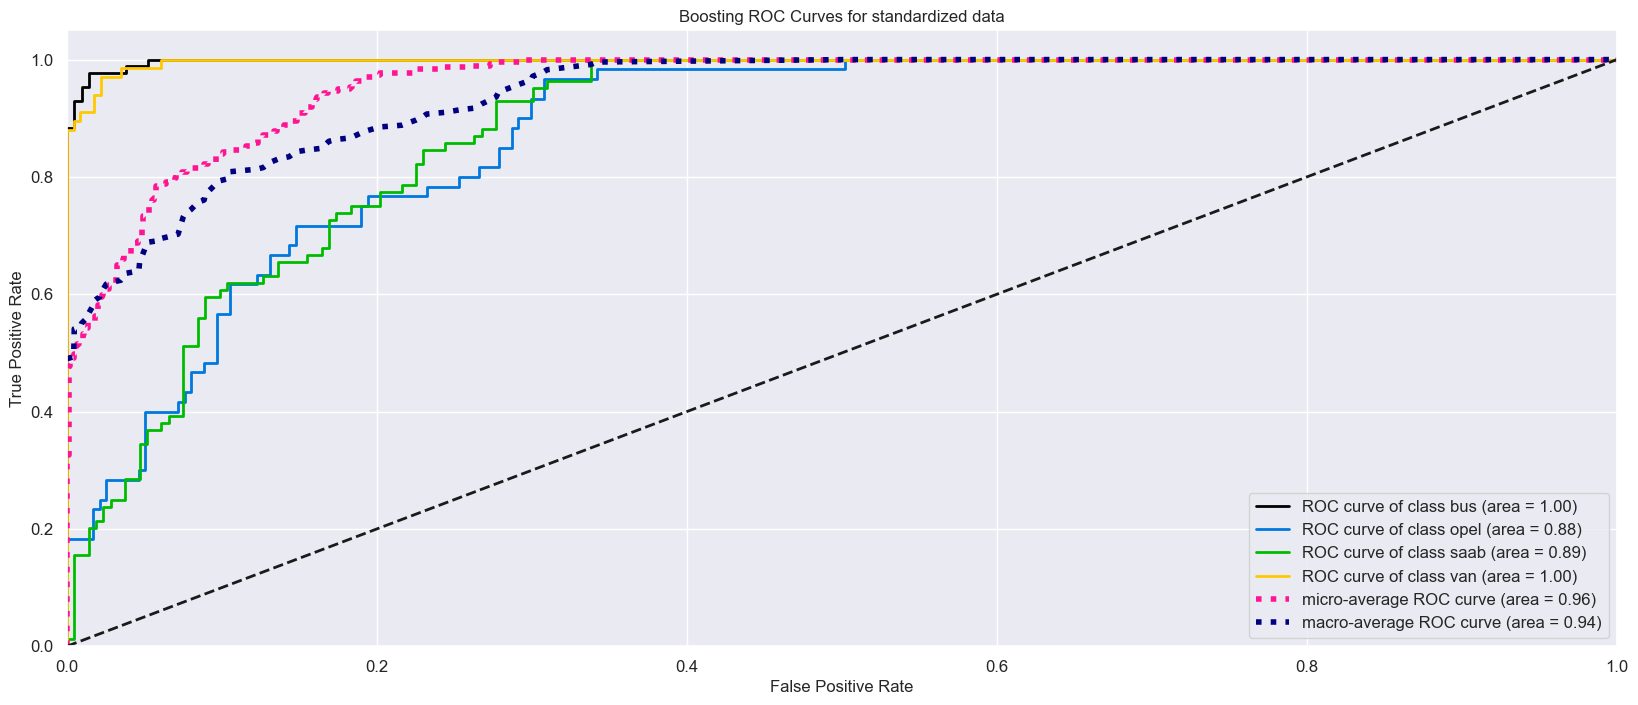

In [181]:
plt.rcParams['figure.figsize'] = (20, 8)

skplt.metrics.plot_roc(y_test, predicted_proba)
plt.title('Boosting ROC Curves for standardized data')

plt.show()

На ROC кривых видны заметные улучшения, особенно на классах bus и van.